In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
path_to_file = 'C:\Users\Administrator\Documents\Python Scripts\examplepark.csv'
data = pd.read_csv(path_to_file)

In [3]:
data['Time'] = ((pd.to_numeric(data['Time'].str.slice(0,2)))*60)+(pd.to_numeric(data['Time'].str.slice(3,5)))+((pd.to_numeric(data['Time'].str.slice(6,8)))/60)
data['Date'] = pd.to_datetime(data['Date'],errors='coerce', format='%d-%m-%Y')
data['Age_Cat'] = pd.to_numeric(data['Age_Cat'].str.slice(2,4),errors='coerce', downcast='signed')
data['Age_Grade'] = pd.to_numeric(data['Age_Grade'].str.slice(0,5),errors='coerce')

In [4]:
data.head(10)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1


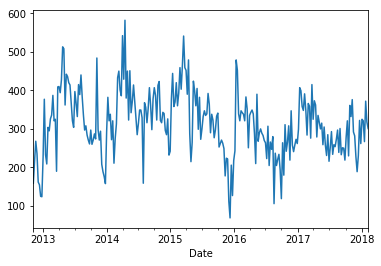

In [5]:
data.groupby('Date').count()['Pos'].plot.line()

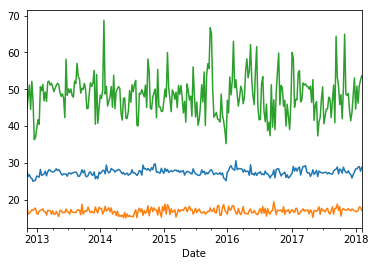

In [6]:
data.groupby('Date').mean()['Time'].plot.line()
data.groupby('Date').min()['Time'].plot.line()
data.groupby('Date').max()['Time'].plot.line()

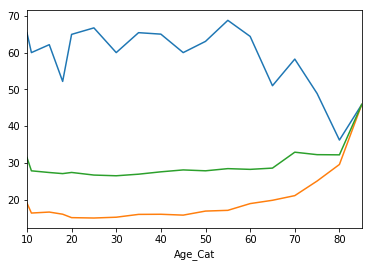

In [7]:
data.groupby('Age_Cat').max()['Time'].plot.line()
data.groupby('Age_Cat').min()['Time'].plot.line()
data.groupby('Age_Cat').mean()['Time'].plot.line()

In [8]:
data.groupby(['Gender','Age_Cat']).describe().head()

Age_Grade                                               \
                   count       mean       std    min      25%     50%   
Gender Age_Cat                                                          
F      10.0        463.0  55.814665  9.654700  27.80  48.9350  55.450   
       11.0       1063.0  53.785240  9.960095  27.15  46.1050  53.050   
       15.0        893.0  50.800459  9.812228  24.62  43.9000  50.330   
       18.0        346.0  53.641676  7.976884  28.48  48.5275  54.115   
       20.0        996.0  50.867781  9.246517  22.79  45.1100  51.465   

                               Gen_Pos             ...         Time  \
                    75%    max   count       mean  ...          75%   
Gender Age_Cat                                     ...                
F      10.0     62.0800  78.95   468.0  89.675214  ...    36.566667   
       11.0     61.3700  84.74  1069.0  76.621141  ...    35.016667   
       15.0     58.4700  80.53   900.0  79.568889  ...    34.862500   
       18.0     59.8225  79.68   352.0  56.090909  ...    30.716667   
       20.0     56.6700  82.91  1006.0  71.701789  ...    32.762500   

                          Total_Runs                                        \
                      max      count       mean        std  min  25%   50%   
Gender Age_Cat                                                               
F      10.0     65.166667      468.0  13.273504  19.209818  1.0  2.0   6.0   
       11.0     59.983333     1069.0  21.328344  22.473908  1.0  4.0  14.0   
       15.0     62.133333      900.0  21.668889  29.245867  1.0  3.0  11.0   
       18.0     52.150000      352.0  54.056818  48.875936  1.0  7.0  31.0   
       20.0     64.933333     1006.0  30.264414  37.544212  1.0  3.0  12.0   

                             
                 75%    max  
Gender Age_Cat               
F      10.0     14.0  122.0  
       11.0     33.0  199.0  
       15.0     31.0  180.0  
       18.0     80.0  135.0  
       20.0     42.0  135.0  

[5 rows x 48 columns]

In [10]:
df1 = data.groupby(['Gender','Age_Cat']).mean()['Time']
df1.head()

Gender  Age_Cat
F       10.0       32.879202
        11.0       31.058809
        15.0       31.332648
        18.0       28.495502
        20.0       30.145129
Name: Time, dtype: float64

In [11]:
df1.unstack()

Age_Cat,10.0,11.0,15.0,18.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0
Gender,,,,,,,,,,,,,,,,,,
F,32.879202,31.058809,31.332648,28.495502,30.145129,29.715819,29.722769,29.445638,30.441809,30.676282,31.072121,32.690354,32.255015,31.679966,47.916667,43.033333,NaN,45.883333
M,30.426167,25.713185,23.841884,24.954148,23.083596,23.203273,23.440808,23.989655,24.031783,25.303550,25.572733,25.796064,26.072968,27.488043,32.162121,31.476488,32.199167,NaN


In [12]:
df1.unstack(level=0)

Gender,F,M
Age_Cat,,
10.0,32.879202,30.426167
11.0,31.058809,25.713185
15.0,31.332648,23.841884
18.0,28.495502,24.954148
20.0,30.145129,23.083596
25.0,29.715819,23.203273
30.0,29.722769,23.440808
35.0,29.445638,23.989655
40.0,30.441809,24.031783


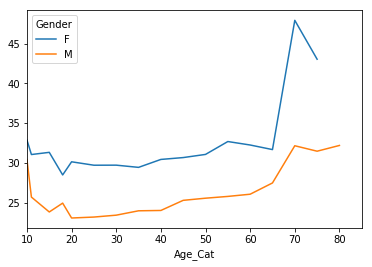

In [13]:
df1.unstack(level=0).plot.line()

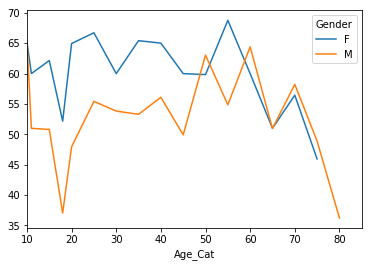

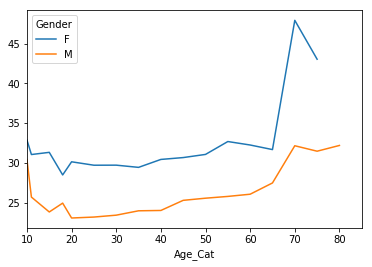

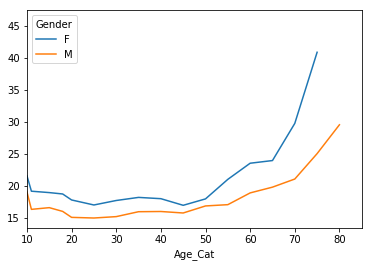

In [14]:
data.groupby(['Gender','Age_Cat']).max()['Time'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).mean()['Time'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).min()['Time'].unstack(level=0).plot.line()

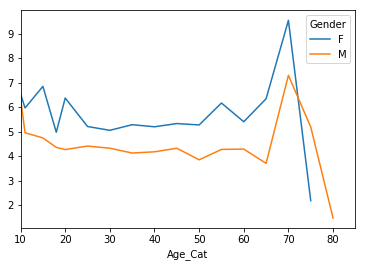

In [15]:
data.groupby(['Gender','Age_Cat']).std()['Time'].unstack(level=0).plot.line()

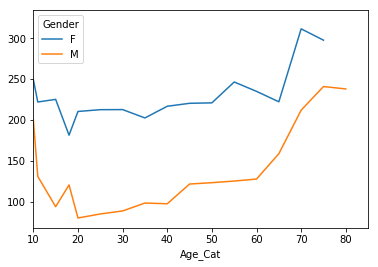

In [16]:
data.groupby(['Gender','Age_Cat']).mean()['Pos'].unstack(level=0).plot.line()

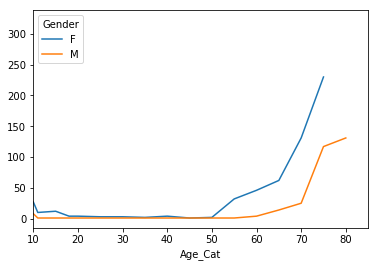

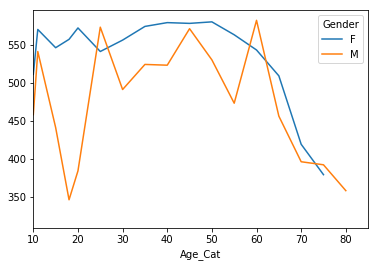

In [17]:
data.groupby(['Gender','Age_Cat']).min()['Pos'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).max()['Pos'].unstack(level=0).plot.line()

In [18]:
df1 = data.groupby(['Gender','Age_Cat']).mean()['Time'].unstack(level=0)

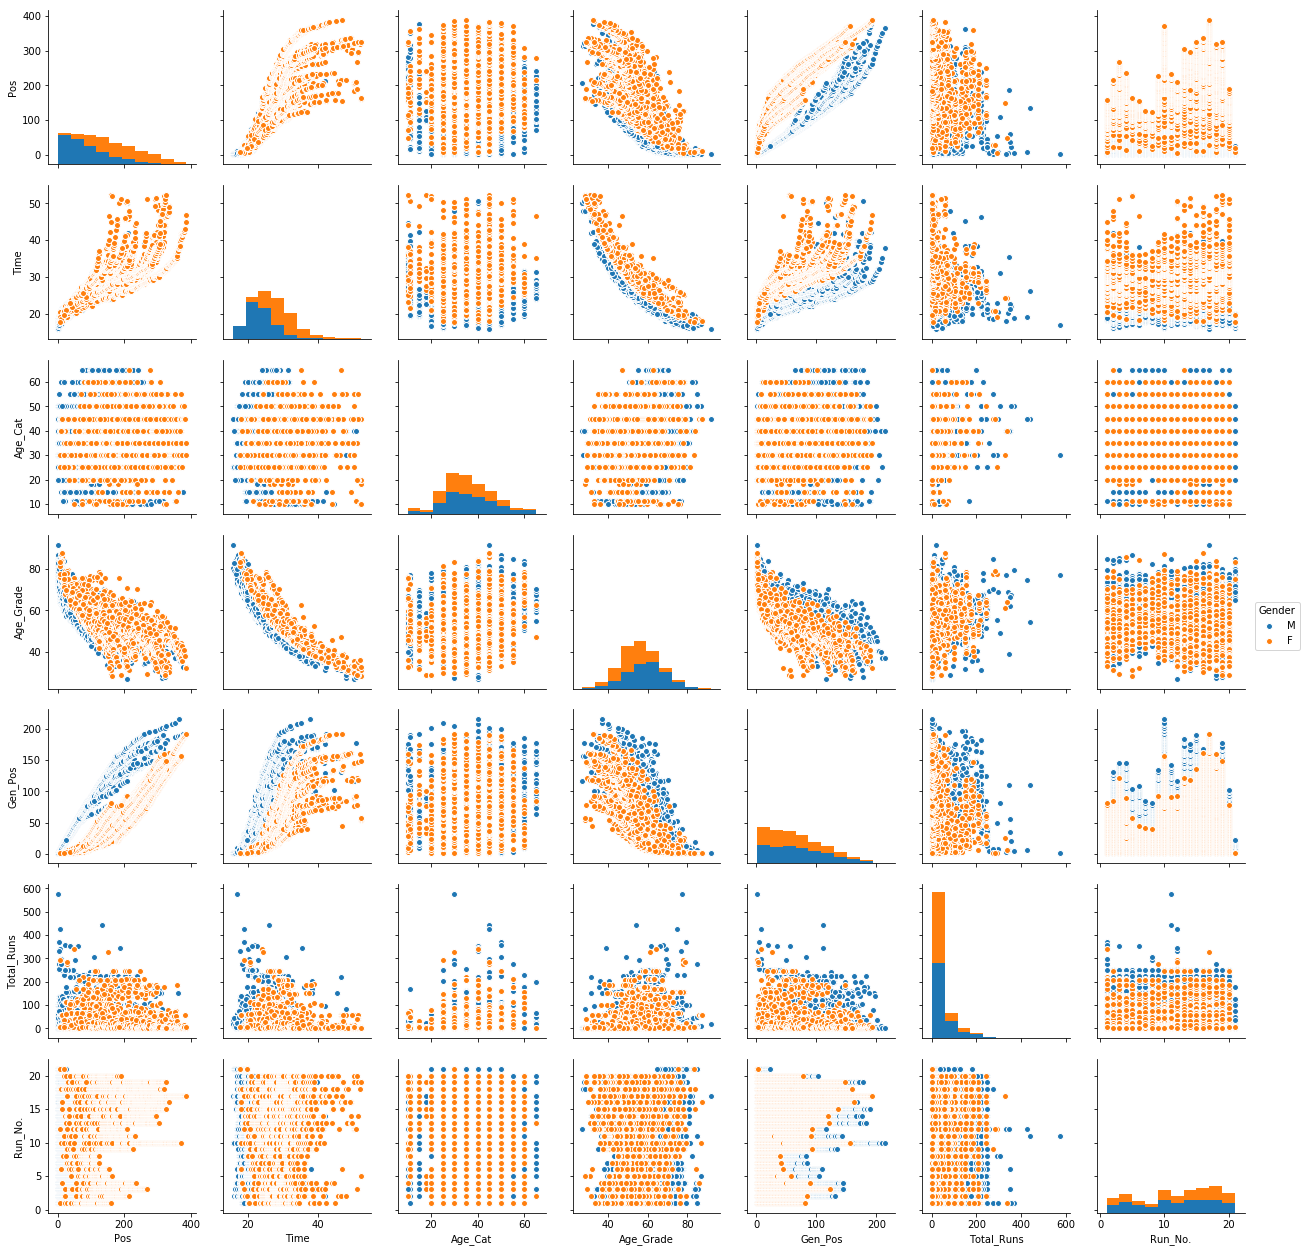

In [19]:
df = data[:5000]
df = df.drop('Club',1)
df = df.dropna()
sns.pairplot(df, hue="Gender")

In [20]:
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [ ]:
df["Gender_Coded"] = coding(df["Gender"], {'M':0,'F':1})

In [ ]:
df = df.drop('Gender',1)
df = df.drop('Note',1)
df = df.drop('Name',1)
df = df.drop('Date',1)
df = df.drop('Gen_Pos',1)
df = df.drop('Age_Grade',1)
df.head(10)

In [ ]:
y = df['Gender_Coded']
y.head(10)

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
param_grid = {'C':[10000,1000],'gamma':[0.0001,0.00001]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
log_predictions = logmodel.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,log_predictions))
print('\n')
print(classification_report(y_test,log_predictions))

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()  # have to scale it for KNN because the values affect the distance

In [ ]:
scaler.fit(df.drop('Gender_Coded',1))

In [ ]:
scaled_features = scaler.transform(df.drop('Gender_Coded',1))

In [ ]:
scaled_features

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
df_feat.head()

In [ ]:
y.head(10)

In [ ]:
X = df_feat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,knn_predictions))
print('\n')
print(classification_report(y_test,knn_predictions))

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.plot(range(1,40),error_rate,color='blue', marker='o',markerfacecolor='red',size=6,aspect=2)
plt.xlabel('K')
plt.ylabel('error rate')
plt.title('Error rate vs K')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,knn_predictions))
print('\n')
print(classification_report(y_test,knn_predictions))

In [ ]:
df.head()

In [ ]:
X = df.drop('Gender_Coded',1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
print(confusion_matrix(y_test,dtree_preds))
print('\n')
print(classification_report(y_test,dtree_preds))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc_preds = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_preds))
print('\n')
print(classification_report(y_test,rfc_preds))

In [ ]:
df.head()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(df.drop('Gender_Coded',1))

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
print(confusion_matrix(df['Gender_Coded'],kmeans.labels_))
print('\n')
print(classification_report(df['Gender_Coded'],kmeans.labels_))

In [ ]:
pca_scaler = StandardScaler()

In [ ]:
pca_scaler.fit(df.drop('Gender_Coded',1))

In [ ]:
scaled_data = scaler.transform(df.drop('Gender_Coded',1))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

In [ ]:
x_pca.shape

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Gender_Coded'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=df.drop('Gender_Coded',1).columns.values)

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)